In [152]:
import os
import sys
import pickle
sys.path.append('../metanas')

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from metanas.utils.visualize import plot
from IPython.display import Image, display, Markdown

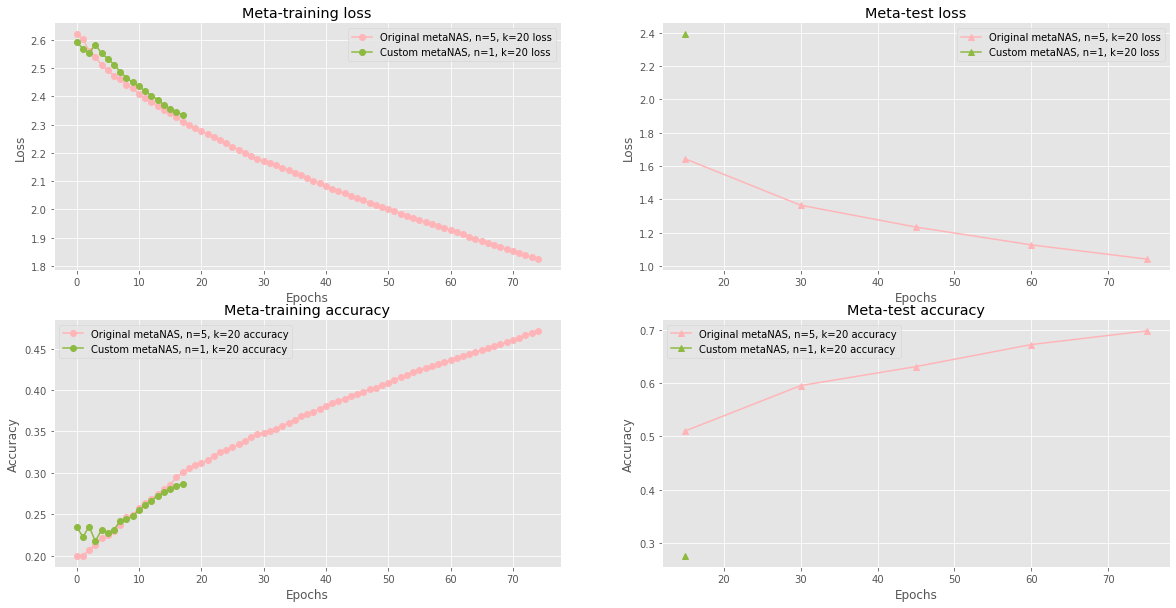

In [138]:
paths = [
#     '/home/rob/Git/meta-fsl-nas/metanas/results/og_train_metanas/experiment.pickle', # metaNAS, n=5, k=20
    '/home/rob/Git/meta-fsl-nas/metanas/results/og_train_metanas_n1/experiment.pickle', # metaNAS, n=1, k=20
    '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_metanas/experiment.pickle', # metaNAS + P-DARTS implementation, n=1, k=20
]

names = [
#     'Original metaNAS, n=1, k=20',
    'Original metaNAS, n=5, k=20',
    'Custom metaNAS, n=1, k=20',
]

plot_loss_accuracies(paths, names, 15)

In [97]:
# paths = [
#     '/home/rob/Git/meta-fsl-nas/metanas/results/og_train_metanas/experiment.pickle', # metaNAS, n=5, k=20
#     '/home/rob/Git/meta-fsl-nas/metanas/results/og_train_metanas_n1/experiment.pickle', # metaNAS, n=1, k=20
#     '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_metanas/experiment.pickle', # metaNAS + P-DARTS implementation, n=1, k=20
#     '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_cutout/experiment.pickle', # metaNAS + P-DARTS + Cutout implementation, n=1, k=20
# ]

# names = [
#     'Original metaNAS, n=1, k=20',
#     'Original metaNAS, n=5, k=20',
#     'Custom metaNAS, n=1, k=20',
#     'Custom metaNAS + Cutout, n=1, k=20'
# ]

# plot_loss_accuracies(paths, names, 15)

def plot_loss_accuracies(paths, names, eval_every=5, title=""):
    results = []
    palette = sns.color_palette()
    palette

    for p in paths:
        with (open(p, 'rb')) as f:
            res = pickle.load(f)
            results.append(res)
    
    _, axes = plt.subplots(2, 2, figsize=(20, 10))
    plt.suptitle(title, fontsize=14)
    test_spacing = np.linspace(eval_every, len(results[0]['train_test_loss']), # Length like train loss
                               num=len(results[0]['test_test_loss']), 
                               retstep=eval_every, dtype=np.int32)[0]

    for i, res in enumerate(results):
        color = palette.pop()
        axes[0, 0].set_title("Meta-training loss")
        axes[0, 0].plot(res['train_test_loss'], 'o-', color=color, label=f"{names[i]} loss")
        axes[0, 0].set_ylabel("Loss")
        axes[0, 0].set_xlabel("Epochs")
        axes[0, 0].legend(loc="best")
        
        axes[0, 1].set_title("Meta-test loss")
        axes[0, 1].plot(test_spacing[:len(res['test_test_loss'])], res['test_test_loss'],  '^-', color=color, label=f"{names[i]} loss")
        axes[0, 1].set_ylabel("Loss")
        axes[0, 1].set_xlabel("Epochs")
        axes[0, 1].legend(loc="best")

        axes[1, 0].set_title("Meta-training accuracy")
        axes[1, 0].plot(res['train_test_accu'], 'o-', color=color, label=f"{names[i]} accuracy")
        axes[1, 0].set_ylabel("Accuracy")
        axes[1, 0].set_xlabel("Epochs")
        axes[1, 0].legend(loc="best")

        axes[1, 1].set_title("Meta-test accuracy")
        axes[1, 1].plot(test_spacing[:len(res['test_test_accu'])], res['test_test_accu'], '^-', color=color,  label=f"{names[i]} accuracy")
        axes[1, 1].set_ylabel("Accuracy")
        axes[1, 1].set_xlabel("Epochs")
        axes[1, 1].legend(loc="best")
        
def plot_loss_accuracy(path, eval_every=5):
    with (open(path, 'rb')) as f:
        res = pickle.load(f)
    
    _, axes = plt.subplots(1, 2, figsize=(20, 5))
    test_spacing = np.linspace(eval_every, len(res['train_test_loss']), # Length like train loss
                               num=len(res['test_test_loss']), 
                               retstep=eval_every, dtype=np.int32)[0]

    axes[0].plot(res['train_test_loss'], 'o-', color="r",label="Training test loss")
    axes[0].plot(test_spacing, res['test_test_loss'],  'o-', color="g",
                 label="Test test loss")
    axes[0].set_ylabel("Loss")
    axes[0].set_xlabel("Epochs")
    axes[0].legend(loc="best")

    axes[1].plot(res['train_test_accu'], 'o-', color="r", label="Training test accuracy")
    axes[1].plot(test_spacing, res['test_test_accu'], 'o-', color="g", label="Test test accuracy")
    axes[1].set_ylabel("Accuracy")
    axes[1].set_xlabel("Epochs")
    axes[1].legend(loc="best")
    
    # Returns the final sparse parameters, accuracy and loss
    return (res['train_test_loss'][-1],
            res['test_test_loss'][-1], res['train_test_accu'][-1], 
            res['test_test_accu'][-1])

def plot_genotype(path, eval_every, print_genotype=True):
    with (open(path, 'rb')) as f:
        res = pickle.load(f)
        
    cwd = os.getcwd()
    if print_genotype:
        print(res['genotype'])
    
    for i in range(len(res['genotype'])):
        if i % eval_every == 0:
            
            display(Markdown(f'# Iteration: {i}'))
            if res['genotype'][i].normal is not None:
                plot(res['genotype'][i].normal, 'normal', 'normal cell')
                display(Image('normal.png'))
                os.remove(os.path.join(cwd, "normal"))
                os.remove(os.path.join(cwd, "normal.png"))
            
            if res['genotype'][i].reduce is not None:
                plot(res['genotype'][i].reduce, 'reduce', 'reduce cell')
                display(Image('reduce.png'))
                os.remove(os.path.join(cwd, "reduce"))
                os.remove(os.path.join(cwd, "reduce.png"))

# Initial experiment results on Omniglot

## Experiment 1
- PDARTS adjustments
- Lower alpha prune values, 0.001
- 75 Epochs, 3 stages, of 25 epochs, 10 warm-up stages

(2.3787265219688414,
 2.639289750099182,
 0.2654666718294223,
 0.25840000411868097)

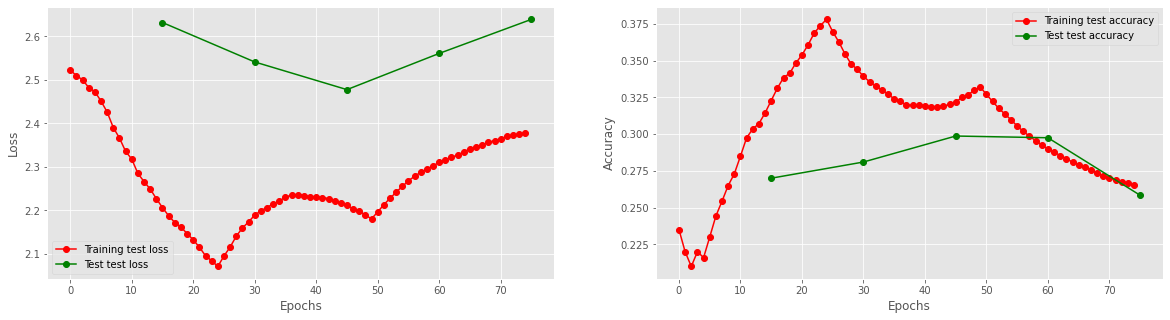

In [16]:
# path to experiment pickle
eval_every_n = 15
path_exp = '/home/rob/Git/meta-fsl-nas/metanas/results/initial_results/og_train/experiment.pickle'

plot_loss_accuracy(path_exp, eval_every_n)
# plot_genotype(path_exp, eval_every_n)

## Experiment 3

- PDARTS learning rate, (lower), 0.0006 for inner-loop

(2.834414276123047,
 2.7040489044189453,
 0.1496888919091887,
 0.22360000389814377)

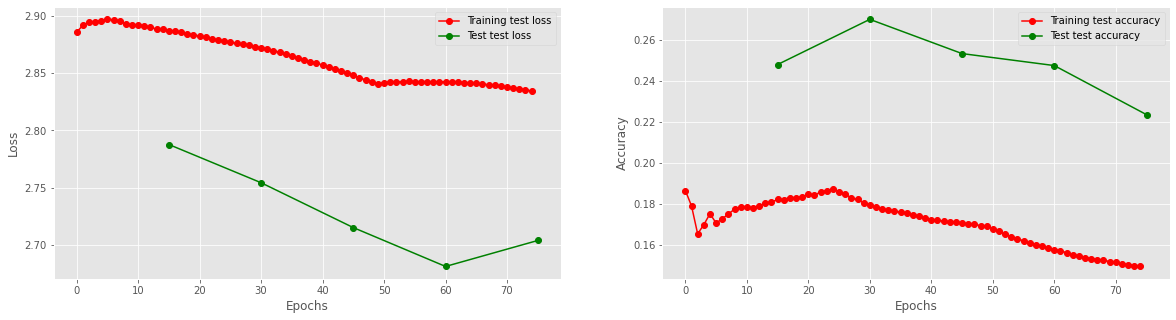

In [19]:
path_exp = '/home/rob/Git/meta-fsl-nas/metanas/results/initial_results/og_train_v3/experiment.pickle'

plot_loss_accuracy(path_exp, eval_every_n)
# plot_genotype(path_exp, eval_every_n)

## Experiment 4

- Original metaNAS learning rate, 
- PDARTS settings for DARTS like the original experiment
- Weight decay as in P-DARTS
- Dropout operations, lower, instead of 0, 0.3, 0.7 to 0, 0.3, 0.5
- 10 warm-up epochs every stage
- Higher pruning rate, meta-model 0.01 and alpha 0.01 prune

(2.6300130670865376,
 2.8381959571838378,
 0.17846666980286438,
 0.14320000261068344)

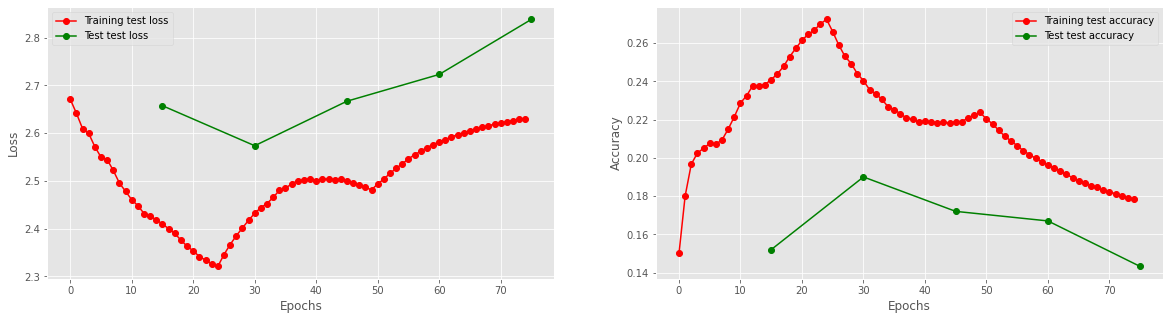

In [20]:
path_exp = '/home/rob/Git/meta-fsl-nas/metanas/results/initial_results/og_train_v4/experiment.pickle'

plot_loss_accuracy(path_exp, 15)
# plot_genotype(path_exp, eval_every_n)

## Experiment 5
As close to experiment 1, as it got the best results.

- dropout operations to 0.0, 0.3, 0.5
- MetaNAS Darts settings, 3 nodes, 4 layers, reduce layer 1 and 3
- No weight & alpha regularization (Could add this again for large experiments)
- 10 warm-up epochs
- Add no layers every epoch, as the original paper might be overfitting to ImageNet
- Low pruning rate as in experiment 0.001

(2.3059138139740365,
 2.592890007019043,
 0.2870491848556233,
 0.21200000301003455)

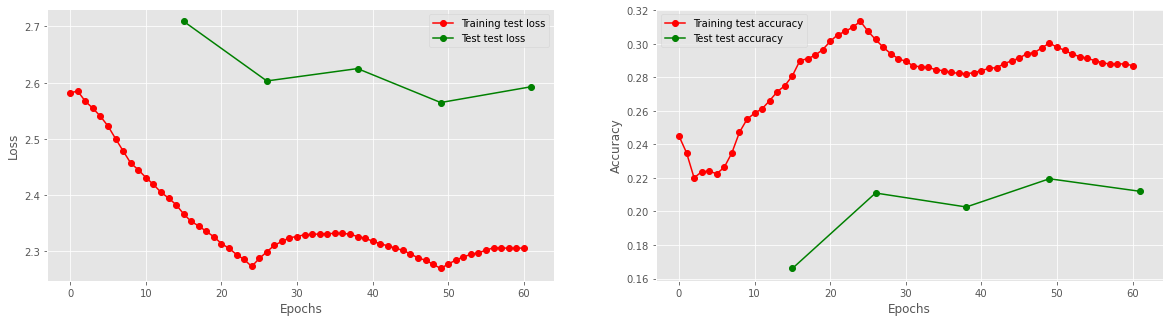

In [21]:
path_exp = '/home/rob/Git/meta-fsl-nas/metanas/results/initial_results/og_train_v5/experiment.pickle'

plot_loss_accuracy(path_exp, 15)
# plot_genotype(path_exp, eval_every_n)

## Experiment 6

- No stages to see how it would optimize without the stages

(2.0239196757801245,
 2.417022671699524,
 0.3938524655814542,
 0.25880000412464144)

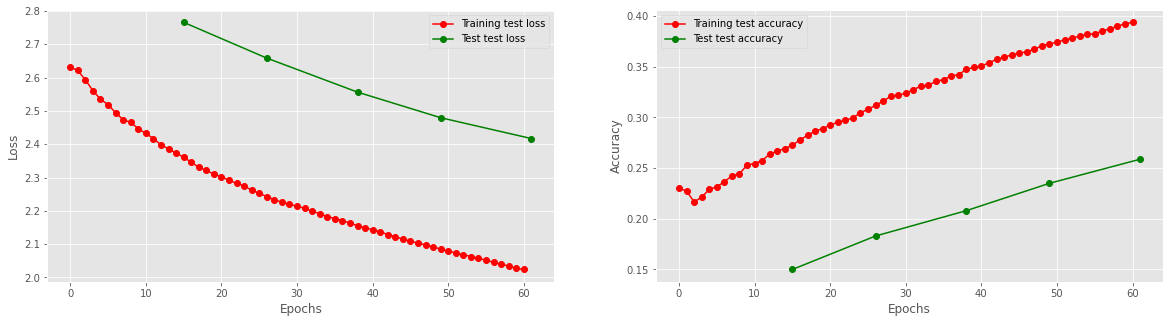

In [22]:
path_exp = '/home/rob/Git/meta-fsl-nas/metanas/results/initial_results/og_train_v6/experiment.pickle'

plot_loss_accuracy(path_exp, 15)

# Second experiment results on Omniglot

## Experiment - plain metaNAS

Genotypes when acc dropped contained 3 or more skip-connections, I assume this is part
of the reason why the accuracy drops

(1.8097852365970613, 1.57458700299263, 0.47386667617658773, 0.5320000112652779)

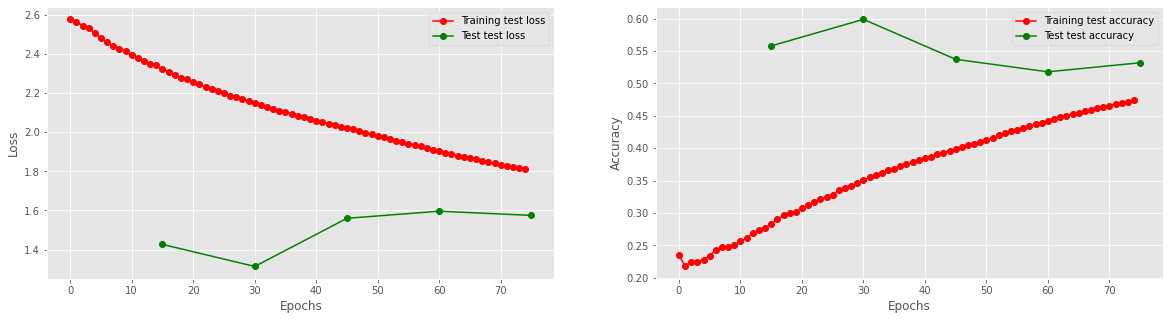

In [141]:
path_exp = '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_metanas/experiment.pickle'
plot_loss_accuracy(path_exp, 15)

## Experiment - plain metaNAS + Cutout

(2.2826252164840697,
 1.9128725438117982,
 0.3032000048011541,
 0.4328000082075596)

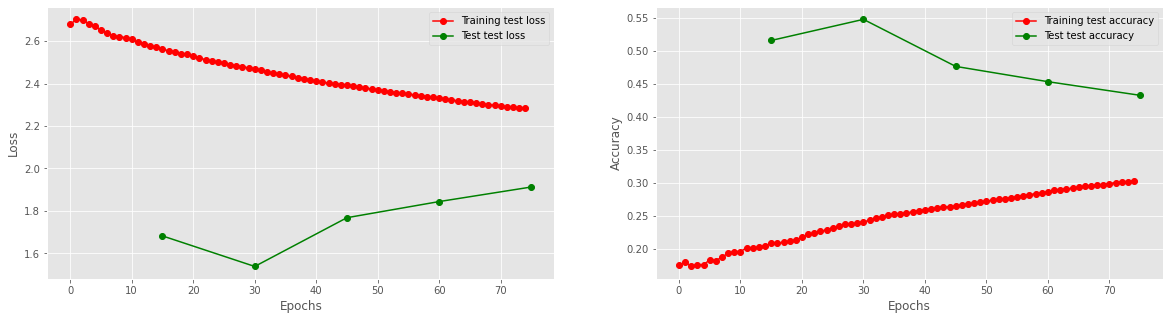

In [59]:
path_exp = '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_cutout/experiment.pickle'
plot_loss_accuracy(path_exp, 15)

# Experiments sharpDARTS

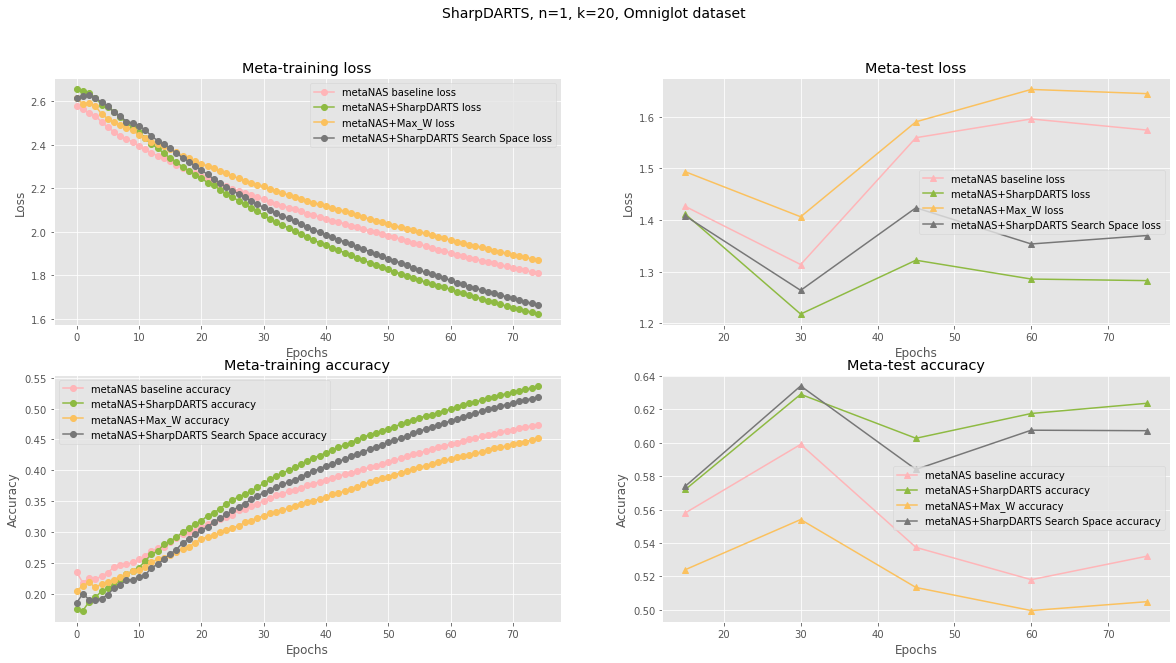

In [16]:
names = [
    'metaNAS baseline',
    'metaNAS+SharpDARTS',
    'metaNAS+Max_W',
    'metaNAS+SharpDARTS Search Space',
]

paths_sharp = [
    '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_metanas/experiment.pickle', # metaNAS + P-DARTS implementation, n=1, k=20
    '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_sharpdarts/experiment.pickle', 
    '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_alpha_reg/experiment.pickle',
    '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_ss_sharp/experiment.pickle',
]


plot_loss_accuracies(paths_sharp, names, 15, title="SharpDARTS, n=1, k=20, Omniglot dataset")

# Experiments P-DARTS

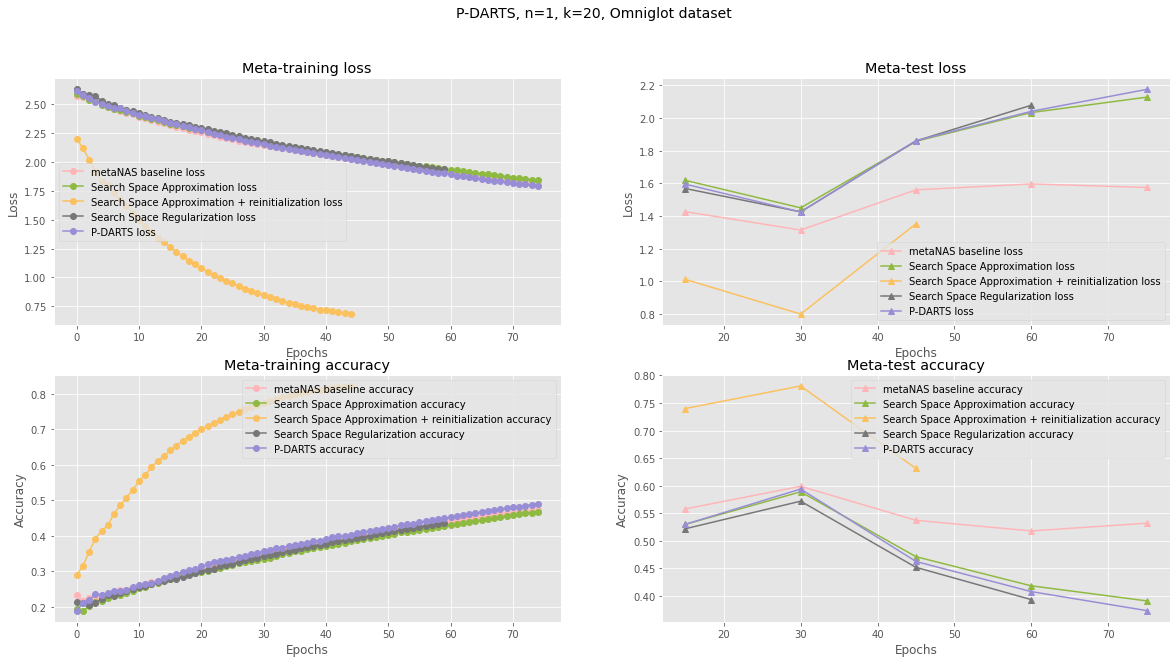

In [209]:
paths_pdarts = [
   '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_metanas/experiment.pickle', # metaNAS + P-DARTS implementation, n=1, k=20
   '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_ssa_v2/experiment.pickle',
   '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_ssa_reinit/experiment.pickle',
   '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_ssr/experiment.pickle', 
   '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_pdarts/experiment.pickle',
]

names = [
    'metaNAS baseline',
    'Search Space Approximation',
    'Search Space Approximation + reinitialization',
    'Search Space Regularization',
    'P-DARTS'
]

plot_loss_accuracies(paths_pdarts, names, 15, title="P-DARTS, n=1, k=20, Omniglot dataset")

# Experiments best performing

ValueError: x and y must have same first dimension, but have shapes (1,) and (5,)

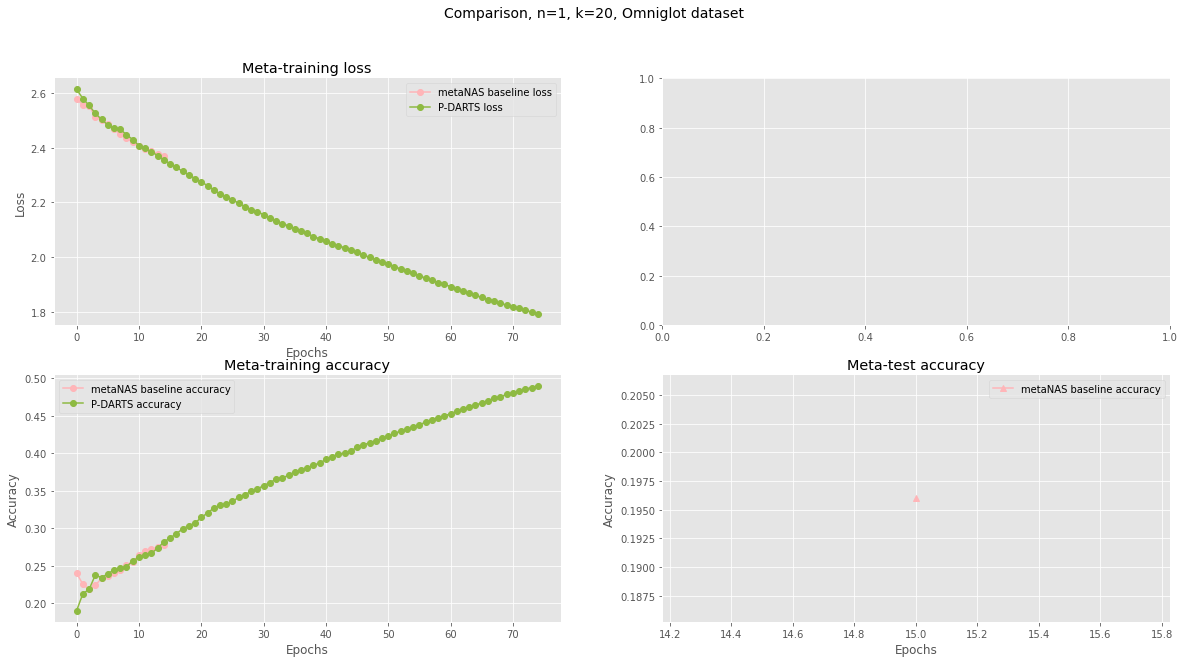

In [164]:
paths_best = [
   '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_metanas/experiment.pickle', # metaNAS + P-DARTS implementation, n=1, k=20
   '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_pdarts/experiment.pickle',
   '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_sharpdarts/experiment.pickle', 
]

names = [
    'metaNAS baseline',
    'P-DARTS',
    'sharpDARTS'
]

plot_loss_accuracies(paths_best, names, 15, title="Comparison, n=1, k=20, Omniglot dataset")

## Third set of ablation studies

In [163]:
def plot_loss_accuracies(paths, names, eval_every=5, title=""):
    results = []
    palette = sns.color_palette()
    palette

    for p in paths:
        with (open(p, 'rb')) as f:
            res = pickle.load(f)
            results.append(res)
    
    _, axes = plt.subplots(2, 2, figsize=(20, 10))
    plt.suptitle(title, fontsize=14)
    test_spacing = np.linspace(eval_every, len(results[0]['train_test_loss']), # Length like train loss
                               num=len(results[0]['test_test_loss']), 
                               retstep=eval_every, dtype=np.int32)[0]

    for i, res in enumerate(results):
        color = palette.pop()
        axes[0, 0].set_title("Meta-training loss")
        axes[0, 0].plot(res['train_test_loss'], 'o-', color=color, label=f"{names[i]} loss")
        axes[0, 0].set_ylabel("Loss")
        axes[0, 0].set_xlabel("Epochs")
        axes[0, 0].legend(loc="best")
        
#         axes[0, 1].set_title("Meta-test loss")
#         axes[0, 1].plot(test_spacing[:len(res['test_test_loss'])], res['test_test_loss'],  '^-', color=color, label=f"{names[i]} loss")
#         axes[0, 1].set_ylabel("Loss")
#         axes[0, 1].set_xlabel("Epochs")
#         axes[0, 1].legend(loc="best")

        axes[1, 0].set_title("Meta-training accuracy")
        axes[1, 0].plot(res['train_test_accu'], 'o-', color=color, label=f"{names[i]} accuracy")
        axes[1, 0].set_ylabel("Accuracy")
        axes[1, 0].set_xlabel("Epochs")
        axes[1, 0].legend(loc="best")

        axes[1, 1].set_title("Meta-test accuracy")
        axes[1, 1].plot(test_spacing[:len(res['test_test_accu'])], res['test_test_accu'], '^-', color=color,  label=f"{names[i]} accuracy")
        axes[1, 1].set_ylabel("Accuracy")
        axes[1, 1].set_xlabel("Epochs")
        axes[1, 1].legend(loc="best")

paths_pdarts = [
   '/home/rob/Git/meta-fsl-nas/metanas/results/og_train_metanas_n1/experiment.pickle',
   '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_metanas/experiment.pickle',
   '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_power_anneal/experiment.pickle',
   '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_alpha_reg_no_pruning/experiment.pickle',
#    '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_ssa_v2/experiment.pickle',
]

names = [
    'metaNAS baseline',
    'metaNAS+ baseline',
    'metaNAS + power annealing',
    'metaNAS + Max W',
#     'metaNAS + SSA',
]

plot_loss_accuracies(paths_pdarts, names, 15, title="P-DARTS, n=1, k=20, Omniglot dataset")

FileNotFoundError: [Errno 2] No such file or directory: '/home/rob/Git/meta-fsl-nas/metanas/results/og_train_metanas_n1/experiment.pickle'

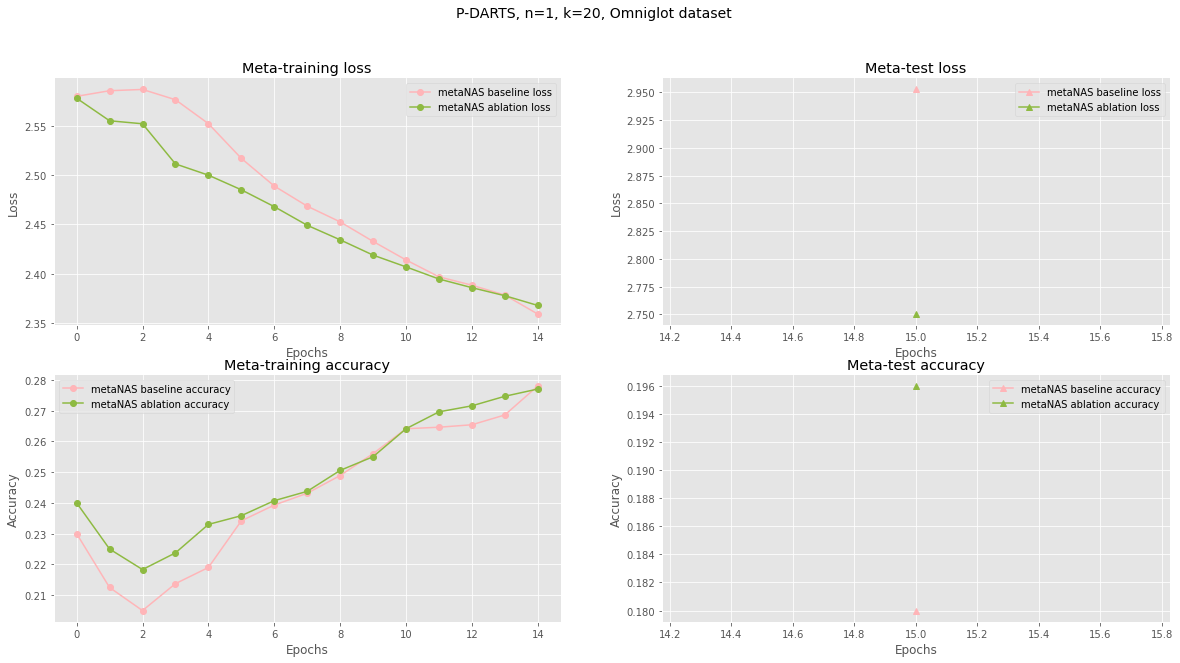

In [162]:
paths_pdarts = [
   '/home/rob/Git/meta-fsl-nas/metanas/results/metanas/og_train_metanas/experiment.pickle',
   '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_metanas/experiment.pickle',
#    '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_metanas/experiment.pickle',
#    '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_power_anneal/experiment.pickle',
#    '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_alpha_reg_no_pruning/experiment.pickle',
#    '/home/rob/Git/meta-fsl-nas/metanas/results/ablation/og_train_ssa_v2/experiment.pickle',
]

names = [
    'metaNAS baseline',
    'metaNAS ablation',
#     'metaNAS + power annealing',
#     'metaNAS + Max W',
#     'metaNAS + SSA',
]

plot_loss_accuracies(paths_pdarts, names, 15, title="P-DARTS, n=1, k=20, Omniglot dataset")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


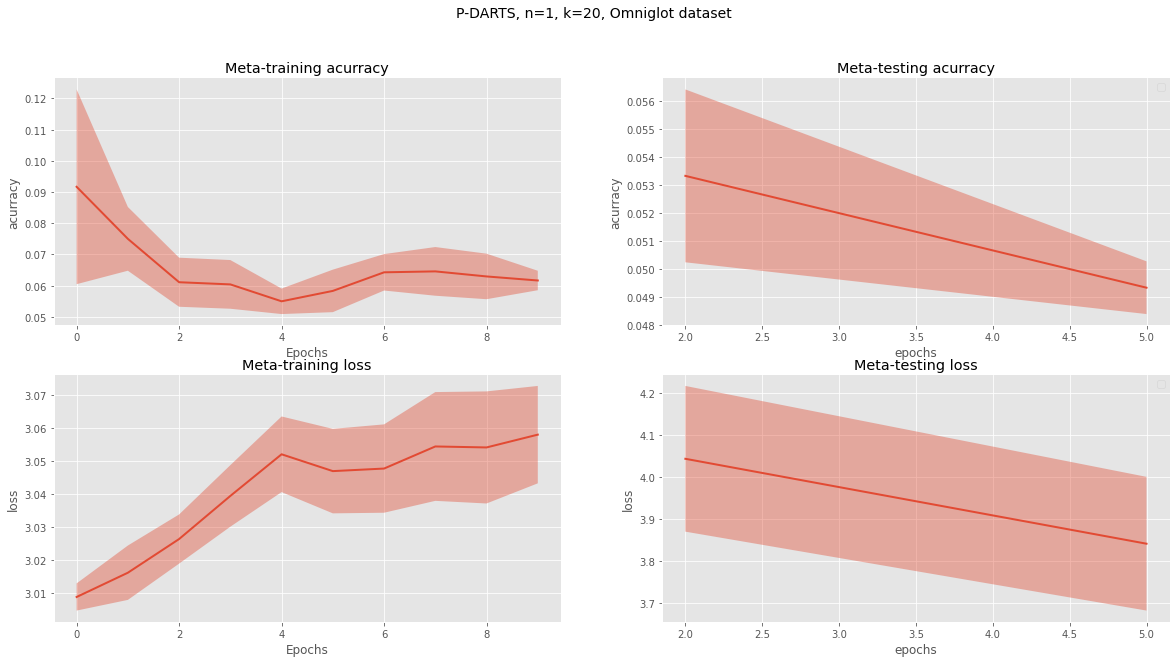

In [172]:
import matplotlib 
import matplotlib.pyplot as plt

import glob
import pickle

import numpy as np

# ax.set_title(
#     "Average accuracy for Omniglot",
#     y=1.08
# )
# ax.set_xlabel("Episode")
# ax.set_ylabel("Accuracy")

# matplotlib.rcParams['font.serif'] = ['CMU Serif Roman']

# matplotlib.rc('figure', figsize = (20, 10))
# # Font size to 14
# matplotlib.rc('font', size = 10) # 40
# # Do not display top and right frame lines
# matplotlib.rc('axes.spines', top = False, right = False)
# # Remove grid lines
# matplotlib.rc('axes', grid = False)
# # Set backgound color to white
# matplotlib.rc('axes', facecolor = 'white')
# ax.legend(loc = 'best')

def plot_accuracy_loss_multiple_seeds(paths, labels, every=5, title=""):
    def get_results(path):
        result = []
        for p in glob.glob(f"{path}/*/experiment.pickle"):
            with (open(p, 'rb')) as f:
                res = pickle.load(f)
                result.append(res)
        return result

    def plot_line_training(ax, result, indice, label, y_label):
        train_acc = np.array([np.array(m[indice]) for m in result])

        len_epoch = len(np.array(result[0][indice]))
        train_acc_mean = train_acc.mean(axis=0)
        train_acc_std = train_acc.std(axis=0)
        
        x_axis_meta = np.array(range(10))
        
        ax.plot(x_axis_meta, train_acc_mean, lw = 2, alpha = 1, label=label)
        ax.set_title(f"Meta-training {y_label}")
        ax.fill_between(x_axis_meta, train_acc_mean - train_acc_std,
                        train_acc_mean + train_acc_std, alpha = 0.4)
        ax.set_xlabel("Epochs")
        ax.set_ylabel(y_label)
    
    def plot_line_test(ax, result, indice, label, y_label):
        test_spacing = np.linspace(every, len(result[0][indice]),
                                   num=len(result[0][indice]), 
                                   retstep=every, dtype=np.int32)[0]

        train_acc = np.array([np.array(m[indice]) for m in result])

        len_epoch = len(np.array(result[0][indice]))
        train_acc_mean = train_acc.mean(axis=0)
        train_acc_std = train_acc.std(axis=0)
        
        
        ax.plot(test_spacing[:len(result[0][indice])],
                train_acc_mean,
                lw = 2,
                alpha = 1,
                label=label)
        ax.fill_between(test_spacing[:len(result[0][indice])],
                        train_acc_mean - train_acc_std,
                        train_acc_mean + train_acc_std, alpha = 0.4)
        ax.set_title(f"Meta-testing {y_label}")
        ax.legend(loc = 'best')
        ax.set_xlabel("epochs")
        ax.set_ylabel(y_label)
    
    results = [get_results(p) for p in paths]
    
    fig, ax = plt.subplots(2, 2, figsize=(20, 10))
    plt.suptitle(title, fontsize=14)
    
    y_label = ["acurracy", "loss"]
    for res in results:
        for i, indice in enumerate(["train_test_accu", "train_test_loss"]):
            plot_line_training(ax[i, 0], res, indice, "", y_label=y_label[i])
        
        for i, indice in enumerate(["test_test_accu", "test_test_loss"]):
            plot_line_test(ax[i, 1], res, indice, "", y_label=y_label[i])


plot_accuracy_loss_multiple_seeds(["/home/rob/Git/meta-fsl-nas/metanas/results/test_exp"], ["test"],
                   title="P-DARTS, n=1, k=20, Omniglot dataset")

In [201]:
%load_ext autoreload
%autoreload 2

from metanas.tasks.torchmeta_loader import TripleMNISTFewShot, OmniglotFewShot


class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)


config = Namespace(k=20, data_path='/home/rob/Git/meta-fsl-nas/data',
                   download=True, q=1, n=5, n_train=15,
                   meta_batch_size=10, test_meta_batch_size=10,
                   workers=1, batch_size=20, batch_size_test=10,
                   seed=42, use_vinyals_split=True)

t_tm = TripleMNISTFewShot(config, download=True)
t_omni = OmniglotFewShot(config, download=True)



task = t_tm.sample_meta_train()[0]
task2 = t_omni.sample_meta_train()[0]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/rob/.conda/envs/meta/lib/python3.7/site-packages/torchvision/transforms/functional.py:943: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/home/rob/.conda/envs/meta/lib/python3.7/site-packages/torchvision/transforms/functional.py:943: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/home/rob/.conda/envs/meta/lib/python3.7/site-packages/torchvision/transforms/functional.py:943: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [202]:
# next(task.train_loader)



for batch_idx, batch in enumerate(task.test_loader):
    print(batch[0][0].shape)

torch.Size([1, 28, 28])


In [203]:


for batch_idx, batch in enumerate(task2.test_loader):
    print(batch[0][0].shape)

torch.Size([1, 28, 28])
